# 2k (ver. 2) analysis

There I updated the definition of the cheating (before all the tracks cheated where assinged to primary)

New definitions
--

- Nominal
    - `msotgia_v09_89_01_01p03_down_singles_both_ifdh_nominal`
- Singles
    - `msotgia_v09_89_01_01p03_down_singles_both_ifdh_cheated_2d`
    - `msotgia_v09_89_01_01p03_down_singles_both_ifdh_cheated_vtx`
    - `msotgia_v09_89_01_01p03_down_singles_both_ifdh_cheated_vtxSelection`
    - `msotgia_v09_89_01_01p03_down_singles_both_ifdh_cheated_3d`
    - `msotgia_v09_89_01_01p03_down_singles_both_ifdh_cheated_nuH`
- Ladder (upward)
    - `msotgia_v09_89_01_01p03_down_singles_both_ifdh_cheated_mva`
    - `msotgia_v09_89_01_01p03_down_singles_both_ifdh_cheated_2d_vtx`
    - `msotgia_v09_89_01_01p03_down_singles_both_ifdh_cheated_2d_vtx_3d`
    - `msotgia_v09_89_01_01p03_down_singles_both_ifdh_cheated_2d_vtx_3d_nu`
    - `msotgia_v09_89_01_01p03_down_singles_both_ifdh_cheated_2d_vtx_3d_nu_mva`
- All files definition
    - `msotgia_v09_89_01_01p03_down_singles_both_ifdh`

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import ultraplot as plot 


import uproot
import mplhep as hep
import hist
import hist.intervals
import hist.plot

plot.rc['figure.facecolor'] = 'none'
plot.rc['savefig.facecolor'] = 'none'
plot.rc['legend.frameon'] = False
plot.rc['axes.autolimit_mode'] = 'data'

plot.rc['cmap.levels'] = 4


class Analysis:
    def __init__(self, data, binning, tree_bases=['reco_true_{}', 'reco_{}', 'true_{}']):
        self.binning = binning
        self.data = data

        self.reco_true_base_string, self.reco_base_string, self.true_base_string = tree_bases

    def efficiency(self, tree_name: str, variable: str = 'true_E'):

        reco_true = self.data[self.reco_true_base_string.format(tree_name)].arrays(library='pd')
        true = self.data[self.true_base_string.format(tree_name)].arrays(library='pd')

        common = pd.merge(reco_true.event, true.event, on='event')
        
        reco_true_H = hist.Hist(self.binning).fill(reco_true[reco_true.event.isin(common.event)][variable].values)
        true_H = hist.Hist(self.binning).fill(true[true.event.isin(common.event)][variable].values)

        reco_true_values = reco_true_H.values()
        true_values = true_H.values()
        
        with np.errstate(divide="ignore", invalid="ignore"):
            efficiency = reco_true_values/true_values
            efficiency_uncertainty = hist.intervals.ratio_uncertainty(
                reco_true_values, true_values, 'efficiency'
            )
        
        return efficiency, efficiency_uncertainty
    
    def purity(self, tree_name: str, variable: str = 'true_E'):
        
        reco_true = self.data[self.reco_true_base_string.format(tree_name)].arrays(library='pd')
        reco = self.data[self.reco_base_string.format(tree_name)].arrays(library='pd')

        common = pd.merge(reco_true.event, reco.event, on='event')
        
        reco_true_H = hist.Hist(self.binning).fill(reco_true[reco_true.event.isin(common.event)][variable].values)
        reco_H = hist.Hist(self.binning).fill(reco[reco.event.isin(common.event)][variable].values)

        reco_true_values = reco_true_H.values()
        reco_values = reco_H.values()
        
        with np.errstate(divide="ignore", invalid="ignore"):
            purity = reco_true_values/reco_values
            purity_uncertainty = hist.intervals.ratio_uncertainty(
                reco_true_values, reco_values, 'efficiency'
            )
        
        return purity, purity_uncertainty

    def spectra(self, tree_name: str, variable: str = 'true_E'):
        
        reco_true = self.data[self.reco_true_base_string.format(tree_name)].arrays(library='pd')
        reco = self.data[self.reco_base_string.format(tree_name)].arrays(library='pd')
        true = self.data[self.true_base_string.format(tree_name)].arrays(library='pd')

        common = pd.merge(reco_true.event, reco.event, on='event')
        common = pd.merge(common.event, true.event, on='event')

        reco_true_H = hist.Hist(self.binning).fill(reco_true[reco_true.event.isin(common.event)][variable].values)
        reco_H = hist.Hist(self.binning).fill(reco[reco.event.isin(common.event)][variable].values)
        true_H = hist.Hist(self.binning).fill(true[true.event.isin(common.event)][variable].values)

        return reco_true_H, reco_H, true_H

class Component:
    def __init__(self, data, binning, tree_base='reco_true_{}'):
        self.data = data
        self.binning = binning

        self.tree_base = tree_base

    def get(self, stage1, product, binning=None):
        if binning is not None:
            self.binning=binning
        data = self.data[self.tree_base.format(stage1)].arrays(library='pd')
        return hist.Hist(self.binning).fill(data[product].values)

    def keys(self, stage1):
        return self.data[self.tree_base.format(stage1)].keys()


In [26]:
data_1u1p = uproot.open('2k_v2_efficiency_plot_1u1p.root:efficiency_studies')
analysis_1u1p = Analysis(data_1u1p, binning=hist.axis.Regular(1, 0.24, 2.4))


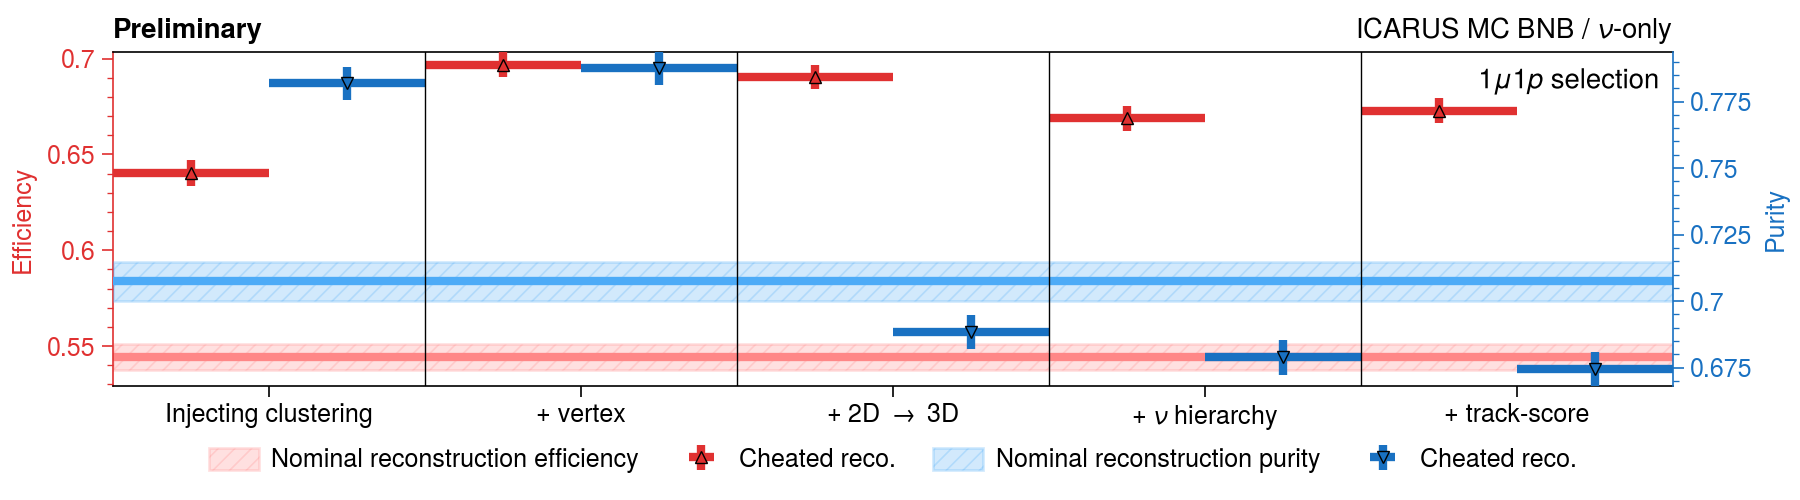

In [27]:
fig, ax = plot.subplots(
    width=9, height=2.5, ncols=1, nrows=1, ylabel=f'Efficiency',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    xticks=[0.5, 1.5, 2.5, 3.5, 4.5], 
    xticklabels=[
        'Injecting clustering',# 'Cheated $2\\mathrm{D}$', 
        '+ vertex',# 'Cheated $2\\mathrm{D} + \\mathrm{vertex}$', 
        '+ 2D $\\to$ 3D',# 'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D}$', 
        '+ $\\nu$ hierarchy',# 'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy}$', 
        '+ track-score'# 'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy} + \\mathrm{MVA}$', 
    ],
    # xrotati,
    urtitle=r'$1\mu1p$ selection'
    # , yscale='log'
)

cheated_dict = {
    'xerr': 0.25, 
    'markersize': 4, 
    'mec': 'k', 
    'markeredgewidth': 0.5, 
    'capsize': 0, 
    'elinewidth': 3
}

trees = [
    'cheated_2d',
    'cheated_2d_vtx',
    'cheated_2d_vtx_3d',
    'cheated_2d_vtx_3d_nu',
    'cheated_2d_vtx_3d_nu_mva',
]


## NOMINAL RECO
efficiency, (low, high) = analysis_1u1p.efficiency('nominal')
ax[0].axhspan(ymin=(efficiency-low)[0], ymax=(efficiency+high)[0], hatch='////', fill=True, color='red4', ec='red4', alpha=0.25, linewidth=1, label='Nominal reconstruction efficiency', zorder=-99)
ax[0].axhline(efficiency, lw=3, c='red4')

ax[0].format(ycolor='red8')
purity_ax = ax[0].alty(color='blue8', label='Purity')

purity, (low, high) = analysis_1u1p.purity('nominal')
purity_ax.axhspan(ymin=(purity-low)[0], ymax=(purity+high)[0], hatch='////', fill=True, color='blue4', ec='blue4', alpha=0.25, linewidth=1, label='Nominal reconstruction purity', zorder=-99)
purity_ax.axhline(purity, lw=3, c='blue4')

## LADDER 
for i, tree in enumerate(trees):
    efficiency, uncertainty = analysis_1u1p.efficiency(tree)
    ax[0].errorbar(i+0.25, efficiency, yerr=uncertainty, **cheated_dict, color='red8', fmt='^', label=('Cheated reco.' if i==0 else None), zorder=99)

    purity, uncertainty = analysis_1u1p.purity(tree)
    purity_ax.errorbar(i+0.75, purity, yerr=uncertainty, **cheated_dict, color='blue8', fmt='v', label=('Cheated reco.' if i==0 else None), zorder=99)
    if i>0: ax[0].axvline(i, color='k', lw=0.5, zorder=100)

# ax[1].format(urtitle='', ultitle=r'$1\mu1p$ selection')
[axi.legend(loc='b', ncols=4) for axi in ax]
[axi.set_title('Preliminary', color='k', loc='left', weight='bold') for axi in ax]


fig.savefig('2k_efficiency_purity_1µ1p.pdf', bbox_inches='tight')

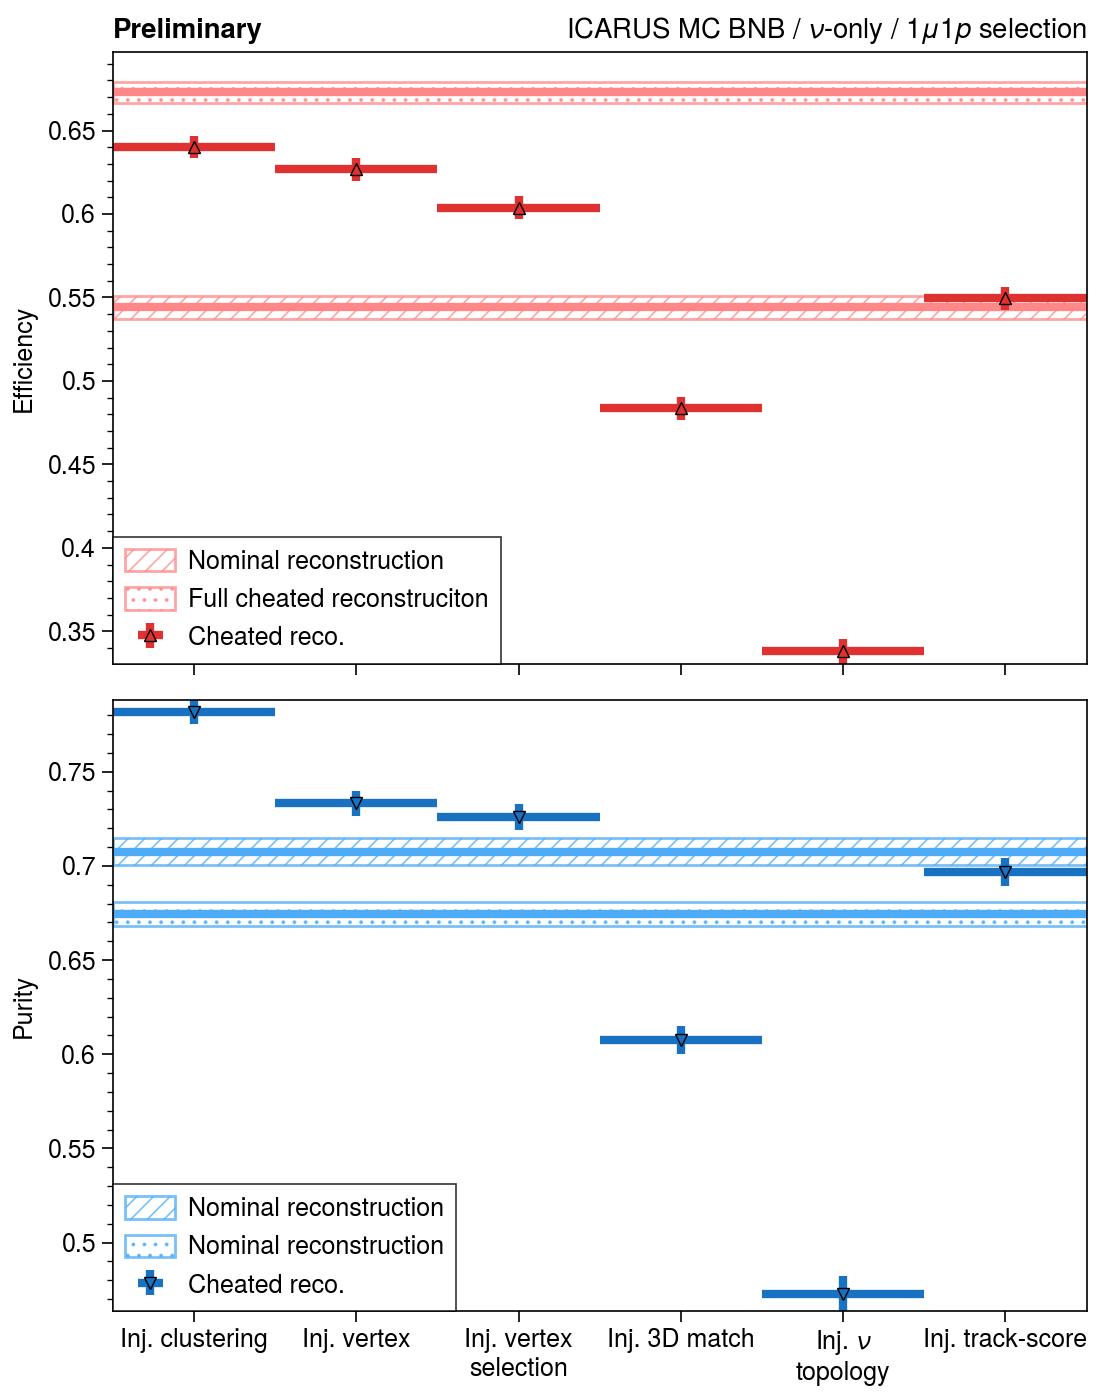

In [96]:
fig, ax = plot.subplots(
    width=5.5, height=7, ncols=1, nrows=2, ylabel='Efficiency',
    titlecolor='k', share=False, grid=False, sharex=True,
    xticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
    xticklabels=[
        'Inj. clustering', 
        'Inj. vertex', 
        'Inj. vertex\nselection', 
        'Inj. 3D match',
        'Inj. $\\nu$\ntopology',
        'Inj. track-score'
    ],
    # xrotation=35,
    # , yscale='log'
)

cheated_dict = {
    'xerr': 0.5, 
    'markersize': 4, 
    'mec': 'k', 
    'markeredgewidth': 0.5, 
    'capsize': 0, 
    'elinewidth': 3
}

trees = [
    'cheated_2d',
    'cheated_vtx',
    'cheated_vtxSelection',
    'cheated_3d',
    'cheated_nuH',
    'cheated_mva'
]


## NOMINAL RECO

for hatch, reco, label in zip(['////', '...'], ['nominal', 'cheated_2d_vtx_3d_nu_mva'], ['Nominal reconstruction', 'Full cheated reconstruciton']):
    efficiency, (low, high) = analysis_1u1p.efficiency(reco)
    ax[0].axhspan(ymin=(efficiency-low)[0], ymax=(efficiency+high)[0], hatch=hatch, fill=False, ec='red4', alpha=0.75, linewidth=1, label=label)
    ax[0].axhline(efficiency, lw=3, c='red4')
    
    purity, (low, high) = analysis_1u1p.purity(reco)
    ax[1].axhspan(ymin=(purity-low)[0], ymax=(purity+high)[0], hatch=hatch, fill=False, ec='blue4', alpha=0.75, linewidth=1, label='Nominal reconstruction')
    ax[1].axhline(purity, lw=3, c='blue4')

## LADDER 
for i, tree in enumerate(trees):
    efficiency, uncertainty = analysis_1u1p.efficiency(tree)
    ax[0].errorbar(i+0.5, efficiency, yerr=uncertainty, **cheated_dict, color='red8', fmt='^', label=('Cheated reco.' if i==0 else None))

    purity, uncertainty = analysis_1u1p.purity(tree)
    ax[1].errorbar(i+0.5, purity, yerr=uncertainty, **cheated_dict, color='blue8', fmt='v', label=('Cheated reco.' if i==0 else None))

ax[1].format(ylabel='Purity')
ax[0].format(rtitle=r'ICARUS MC BNB / $\nu$-only / $1\mu1p$ selection')
ax[0].legend(ncols=1, loc='ll', frameon=True)
ax[1].legend(ncols=1, loc='ll', frameon=True)
[ax[0].set_title('Preliminary', color='k', loc='left', weight='bold') for axi in ax]

fig.savefig('2k_efficiency_purity_1µ1p_singles.pdf', bbox_inches='tight')

# 1µNp ANALYSIS

In [29]:
data_1uNp = uproot.open('2k_v2_efficiency_plot_1uNp.root:efficiency_studies')
analysis_1uNp = Analysis(data_1uNp, binning=hist.axis.Regular(1, 0.24, 2.4))


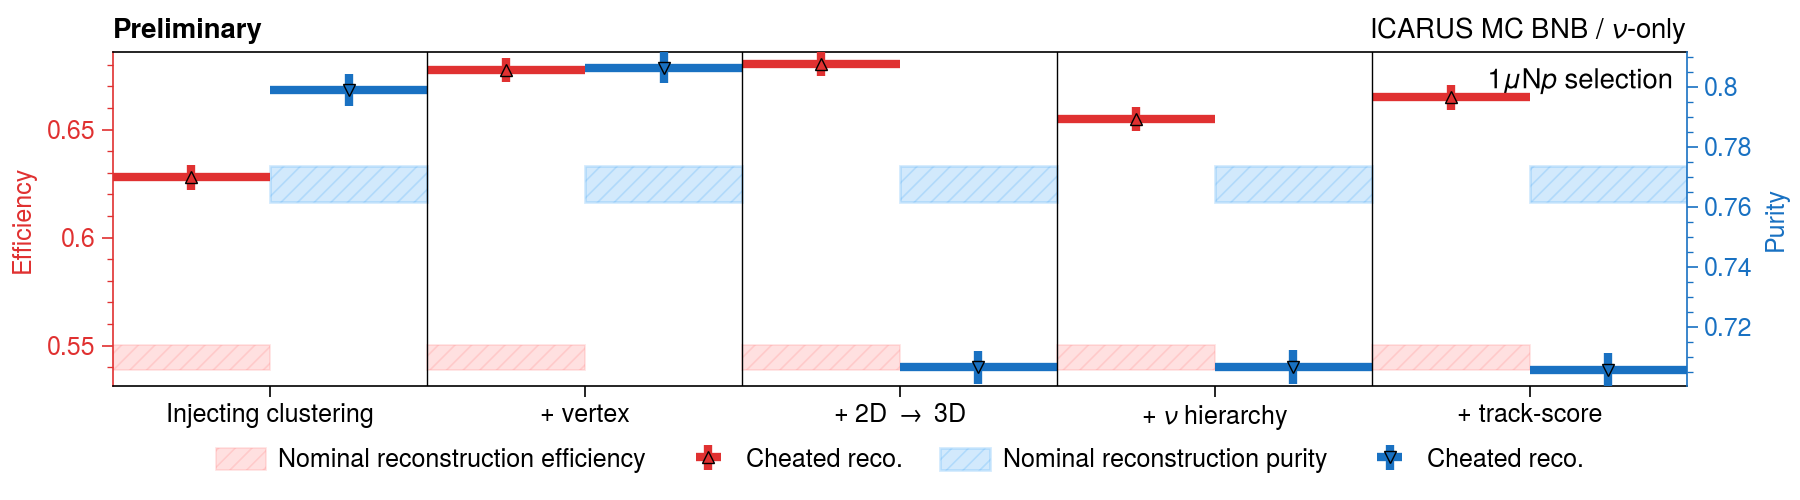

In [95]:
fig, ax = plot.subplots(
    width=9, height=2.5, ncols=1, nrows=1, ylabel=f'Efficiency',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    xticks=[0.5, 1.5, 2.5, 3.5, 4.5], 
    xticklabels=[
        'Injecting clustering',# 'Cheated $2\\mathrm{D}$', 
        '+ vertex',# 'Cheated $2\\mathrm{D} + \\mathrm{vertex}$', 
        '+ 2D $\\to$ 3D',# 'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D}$', 
        '+ $\\nu$ hierarchy',# 'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy}$', 
        '+ track-score'# 'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy} + \\mathrm{MVA}$', 
    ],
    # xrotati,
    urtitle=r'$1\mu\mathrm{N}p$ selection'
    # , yscale='log'
)

cheated_dict = {
    'xerr': 0.25, 
    'markersize': 4, 
    'mec': 'k', 
    'markeredgewidth': 0.5, 
    'capsize': 0, 
    'elinewidth': 3
}

trees = [
    'cheated_2d',
    'cheated_2d_vtx',
    'cheated_2d_vtx_3d',
    'cheated_2d_vtx_3d_nu',
    'cheated_2d_vtx_3d_nu_mva',
]


## NOMINAL RECO
ax[0].format(ycolor='red8')
purity_ax = ax[0].alty(color='blue8', label='Purity')

## LADDER 
for i, tree in enumerate(trees):
    efficiency, (low, high) = analysis_1uNp.efficiency('nominal')
    ax[0].add_patch(mpl.patches.Rectangle((i, (efficiency-low)[0]), 0.5, (low+high)[0], 
                                          hatch='////', fill=True, facecolor='red4', ec='red4', alpha=0.25, 
                                          label=('Nominal reconstruction efficiency' if i==0 else None), zorder=-99))

    purity, (low, high) = analysis_1uNp.purity('nominal')
    purity_ax.add_patch(mpl.patches.Rectangle((i+0.5, (purity-low)[0]), 0.5, (low+high)[0],
                                              hatch='////', fill=True, color='blue4', ec='blue4', alpha=0.25, linewidth=1, 
                                              label=('Nominal reconstruction purity' if i==0 else None), zorder=-99))
    
    efficiency, uncertainty = analysis_1uNp.efficiency(tree)
    ax[0].errorbar(i+0.25, efficiency, yerr=uncertainty, **cheated_dict, color='red8', fmt='^', label=('Cheated reco.' if i==0 else None), zorder=99)

    purity, uncertainty = analysis_1uNp.purity(tree)
    purity_ax.errorbar(i+0.75, purity, yerr=uncertainty, **cheated_dict, color='blue8', fmt='v', label=('Cheated reco.' if i==0 else None), zorder=99)
    if i>0: ax[0].axvline(i, color='k', lw=0.5, zorder=100)

[axi.legend(loc='b', ncols=4) for axi in ax]
[axi.set_title('Preliminary', color='k', loc='left', weight='bold') for axi in ax]


fig.savefig('2k_efficiency_purity_1µNp.pdf', bbox_inches='tight')

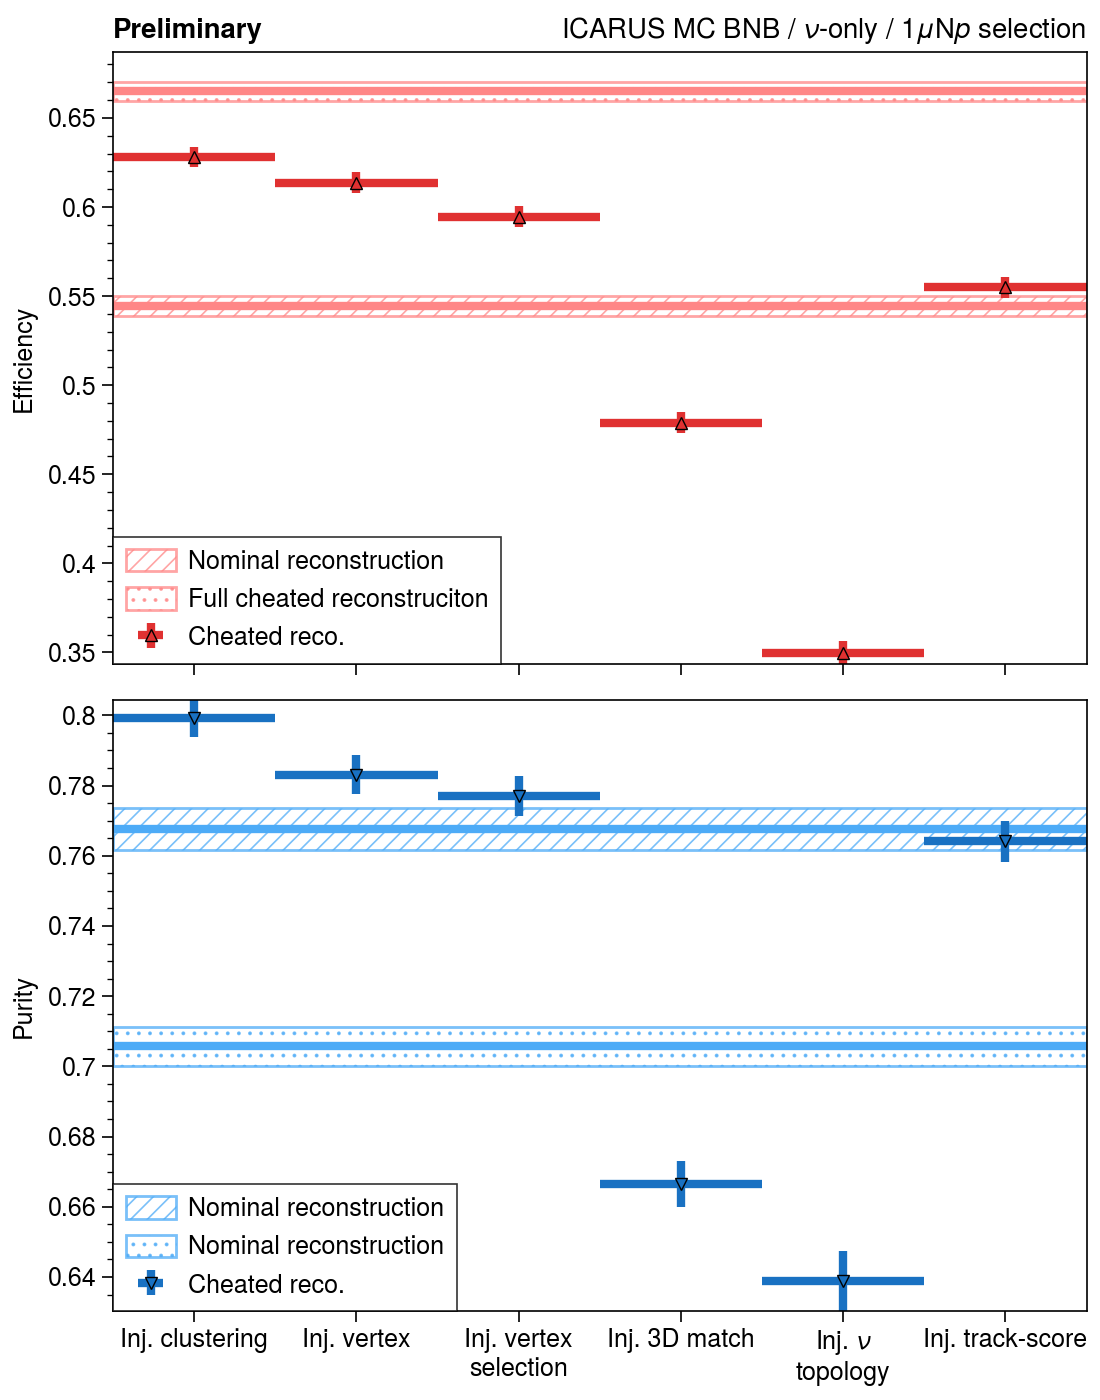

In [31]:
fig, ax = plot.subplots(
    width=5.5, height=7, ncols=1, nrows=2, ylabel='Efficiency',
    titlecolor='k', share=False, grid=False, sharex=True,
    xticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
    xticklabels=[
        'Inj. clustering', 
        'Inj. vertex', 
        'Inj. vertex\nselection', 
        'Inj. 3D match',
        'Inj. $\\nu$\ntopology',
        'Inj. track-score'
    ],
    # xrotation=35,
    # , yscale='log'
)

cheated_dict = {
    'xerr': 0.5, 
    'markersize': 4, 
    'mec': 'k', 
    'markeredgewidth': 0.5, 
    'capsize': 0, 
    'elinewidth': 3
}

trees = [
    'cheated_2d',
    'cheated_vtx',
    'cheated_vtxSelection',
    'cheated_3d',
    'cheated_nuH',
    'cheated_mva'
]


## NOMINAL RECO

for hatch, reco, label in zip(['////', '...'], ['nominal', 'cheated_2d_vtx_3d_nu_mva'], ['Nominal reconstruction', 'Full cheated reconstruciton']):
    efficiency, (low, high) = analysis_1uNp.efficiency(reco)
    ax[0].axhspan(ymin=(efficiency-low)[0], ymax=(efficiency+high)[0], hatch=hatch, fill=False, ec='red4', alpha=0.75, linewidth=1, label=label)
    ax[0].axhline(efficiency, lw=3, c='red4')
    
    purity, (low, high) = analysis_1uNp.purity(reco)
    ax[1].axhspan(ymin=(purity-low)[0], ymax=(purity+high)[0], hatch=hatch, fill=False, ec='blue4', alpha=0.75, linewidth=1, label='Nominal reconstruction')
    ax[1].axhline(purity, lw=3, c='blue4')

## LADDER 
for i, tree in enumerate(trees):
    efficiency, uncertainty = analysis_1uNp.efficiency(tree)
    ax[0].errorbar(i+0.5, efficiency, yerr=uncertainty, **cheated_dict, color='red8', fmt='^', label=('Cheated reco.' if i==0 else None))

    purity, uncertainty = analysis_1uNp.purity(tree)
    ax[1].errorbar(i+0.5, purity, yerr=uncertainty, **cheated_dict, color='blue8', fmt='v', label=('Cheated reco.' if i==0 else None))

ax[1].format(ylabel='Purity')
ax[0].format(rtitle=r'ICARUS MC BNB / $\nu$-only / $1\mu\mathrm{N}p$ selection')
ax[0].legend(ncols=1, loc='ll', frameon=True)
ax[1].legend(ncols=1, loc='ll', frameon=True)
[ax[0].set_title('Preliminary', color='k', loc='left', weight='bold') for axi in ax]

fig.savefig('2k_efficiency_purity_1µNp_singles.pdf', bbox_inches='tight')

In [52]:


def plot_spectra(name, data=data_1uNp, color='teal', variable = 'true_E', energy_bins = hist.axis.Regular(18, 0.24, 2.4),
                 cheated_loader_mid='cheated_vtxSelection', spectra_max=1700, eff_max=0.95):

    variable_dict = {
        'true_E': 'true energy',
        'reco_E': 'reconstructed energy',
        'reco_pT': 'reconstructed $p_T$'
    }
    
    cheated_dict = {
        'cheated_vtx': 'vertex',
        'cheated_vtxSelection': 'vertex selection',
        'cheated_mva': 'track-score',
        'cheated_2d': 'clustering'
    }

    analysis_1u1p = Analysis(data=data, binning=energy_bins)
    analysis_1u1p_integrated = Analysis(data=data, binning=hist.axis.Regular(1, 0.24, 2.4))

    fig, axs = plot.subplots(
        width=6.5, height=4, ncols=1, nrows=1, ylabel=f'Selected spills / {energy_bins.widths[0]:.2f} GeV',
        titlecolor='k', share=False, grid=False, 
        xlabel='Neutrino {} (GeV)'.format(variable_dict[variable]),
        rtitle=r'ICARUS MC BNB / $\nu$-only $1\mu1p$', 
        ltitle='Work in progress'
    )

    ax = axs[0]

    reco_true, _, true = analysis_1u1p.spectra('nominal', variable)
    hep.histplot(true, ax=ax, histtype='fill', color='gray1', label=r'True $1\mu1p$')
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray4', lw=3, label=r'Reco + true $1\mu1p$ (nominal reco.)')
        
    reco_true, _, _ = analysis_1u1p.spectra('{}'.format(cheated_loader_mid), variable)
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray6', lw=1.5, ls='--', label=r'Reco + true $1\mu1p$ (injected {})'.format(cheated_dict[cheated_loader_mid]))
    reco_true, _, _ = analysis_1u1p.spectra('cheated_2d_vtx_3d_nu_mva', variable)
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray8', lw=1.5, ls=':', label=r'Reco + true $1\mu1p$ (injected all MC)')
    
    ax.format(ymax=spectra_max)
    ax.legend(ncols=1, loc='ul')
        
    secax = ax.alty(color=f'{color}8', label=f'Efficiency / {energy_bins.widths[0]:.2f} GeV')
        
    efficiency, uncertainty = analysis_1u1p.efficiency('cheated_2d_vtx_3d_nu_mva', variable)
    integrated_efficiency, _ = analysis_1u1p_integrated.efficiency('cheated_2d_vtx_3d_nu_mva', variable)
    eb = secax.errorbar(energy_bins.centers, efficiency, yerr=uncertainty, xerr=energy_bins.widths[0]/2, 
                        color=f'{color}7', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Injected all MC ({:.1f} %)'.format(integrated_efficiency[0]*100))
        
    efficiency, uncertainty = analysis_1u1p.efficiency('{}'.format(cheated_loader_mid), variable)
    integrated_efficiency, _ = analysis_1u1p_integrated.efficiency('{}'.format(cheated_loader_mid), variable)
    eb = secax.errorbar(energy_bins.centers, efficiency, yerr=uncertainty, xerr=energy_bins.widths[0]/2, color=f'{color}9', fmt='v', markersize=4, 
                        mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Injected {} ({:.1f} %)'.format(cheated_dict[cheated_loader_mid], integrated_efficiency[0]*100))
        
    efficiency, (low, high) = analysis_1u1p.efficiency('nominal', variable)
    integrated_efficiency, _ = analysis_1u1p_integrated.efficiency('nominal', variable)
    eb = secax.bar(x=energy_bins.centers, height=high+low, bottom=efficiency-low, alpha=0.5, width=1,
                        color=f'{color}5', label='Nominal reco. ({:.1f} %)'.format(integrated_efficiency[0]*100), edgefix=True)
    
    secax.format(ymax=eff_max)
    secax.legend(ncols=1, loc='ur')

    fig.savefig(name, bbox_inches='tight')

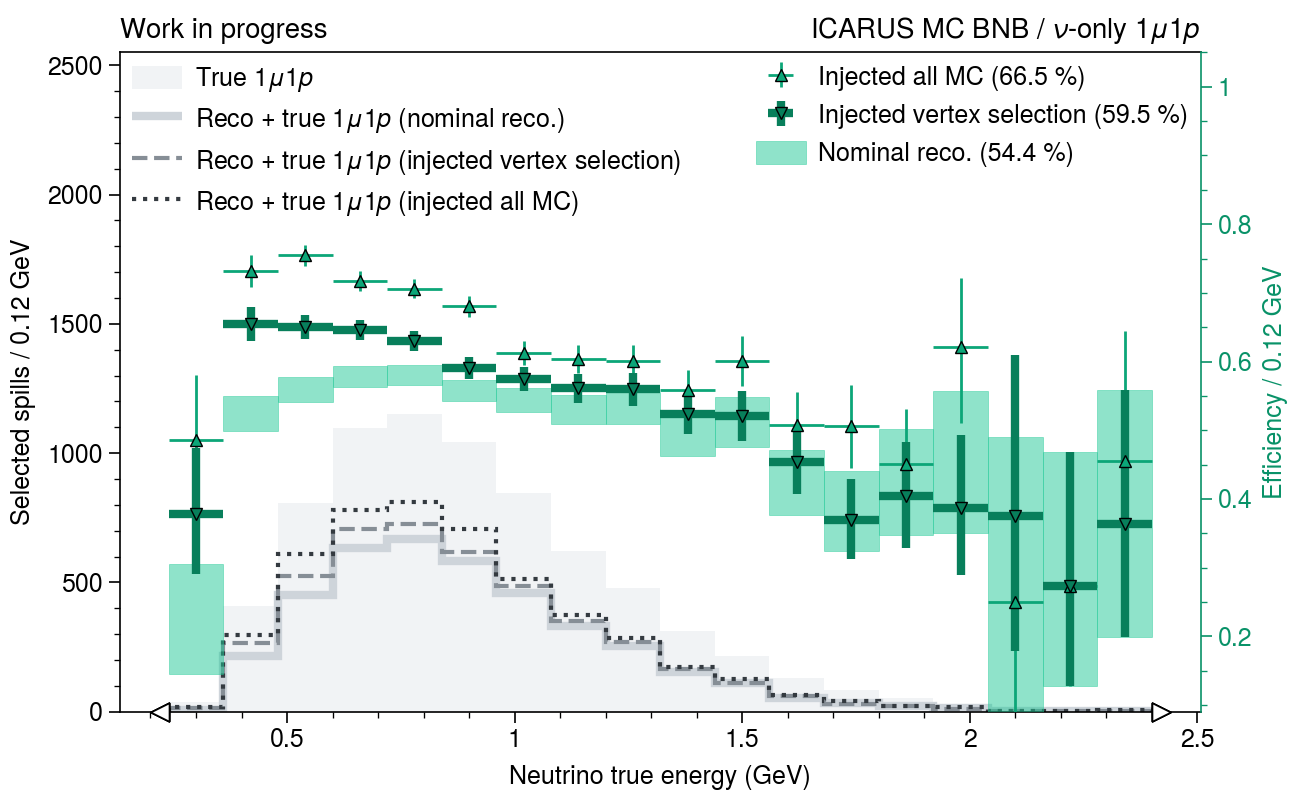

In [53]:
plot_spectra('2k_v2_efficiency_vtxSelection.pdf', variable='true_E', eff_max=1.05, spectra_max=2550)

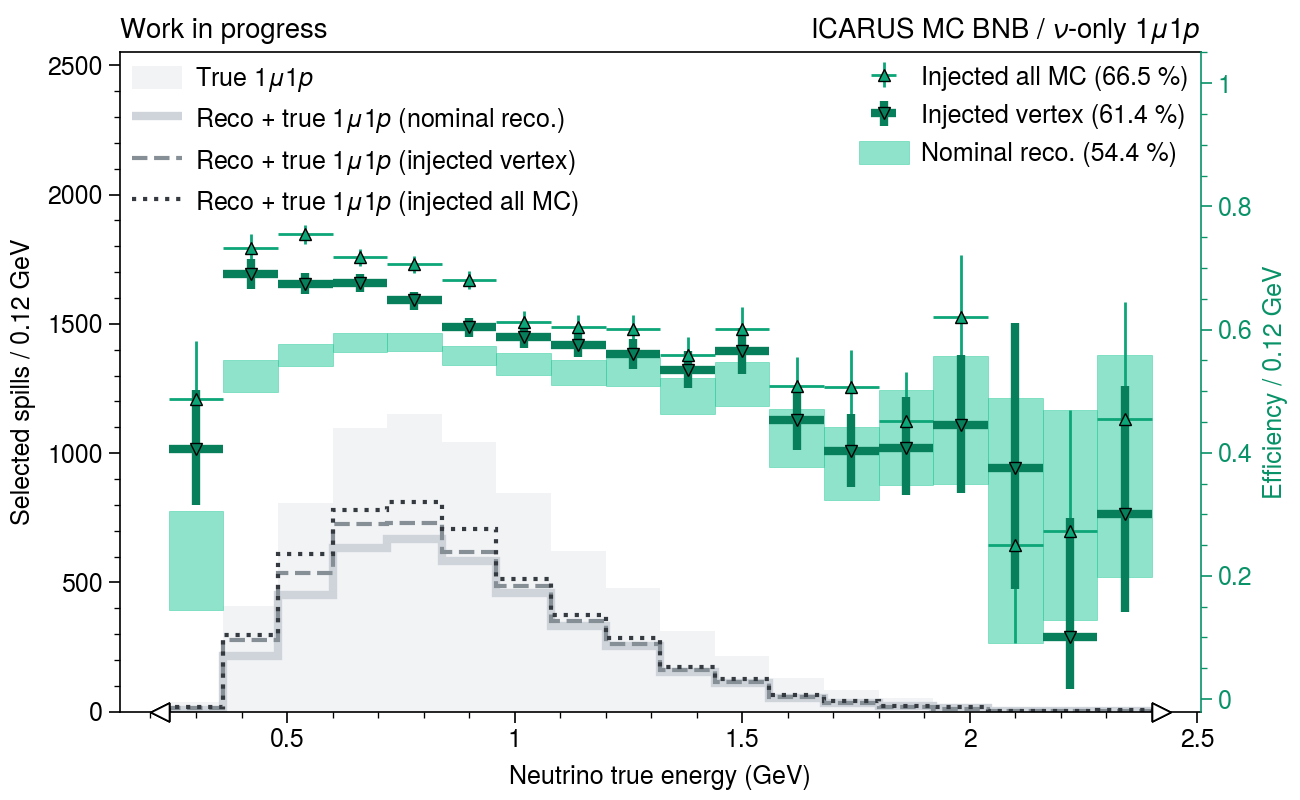

In [54]:
plot_spectra('2k_v2_efficiency_vtx.pdf', cheated_loader_mid='cheated_vtx', variable='true_E', eff_max=1.05, spectra_max=2550)